In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os

### Imputation

In [2]:
### Data Imputation ###
from sklearn.impute import KNNImputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

scaler_x_y = MinMaxScaler()
scaler_z = MinMaxScaler(feature_range=(-0.5, 0.5))
# Define K-Nearest Neighbors imputations
knn = KNNImputer(n_neighbors=5)

x_y_columns = []
z_columns = []

x_count = 0
y_count = 1
z_count = 2

for i in range(0, 99, 1):
    if i == x_count:
        x_y_columns.append(i)
        x_count += 3
    elif i == y_count:
        x_y_columns.append(i)
        y_count += 3
    else:
        z_columns.append(i)

def imputation(data):
    df = pd.read_csv(data, header=None, sep=' ')
    # Find total count of zeros in the DataFrame
    total_zeros = ( df.eq(0.0) ).sum().sum()

    # Calculate missing percentages
    missing_val = total_zeros/df.count().sum()
    print(f'Total number of Zeros: {total_zeros} \nMissing -> {missing_val*100:0,.2f}%')

    # Change 0.0 to NaN value the KNN can detect NaN to imputate and replace the missing data
    missing_df = df.replace(to_replace=0.0, value=np.nan)
    imputed_df = pd.DataFrame(knn.fit_transform(missing_df))

    scaled_data_x_y = scaler_x_y.fit_transform(imputed_df[x_y_columns])
    scaled_data_z = scaler_z.fit_transform(imputed_df[z_columns])
    
    imputed_df[x_y_columns] = scaled_data_x_y
    imputed_df[z_columns] = scaled_data_z

    print(imputed_df)
    print(f'Imputation is successful')

    return df, imputed_df

In [3]:
# Sample imputation
data, imputed_data = imputation('Data/Normal/mai_normal_ske.txt')

Total number of Zeros: 405 
Missing -> 5.38%
          0         1         2         3         4         5         6   \
0   0.519231  0.008097  0.357321  0.604651  0.025751  0.304460  0.627119   
1   0.647436  0.000000  0.319992  0.759690  0.000000  0.286937  0.796610   
2   0.685897  0.048583  0.301742  0.813953  0.012876  0.269415  0.855932   
3   0.820513  0.186235  0.300083  0.914729  0.085837  0.269016  0.974576   
4   0.769231  0.161943  0.282663  0.914729  0.158798  0.268220  0.915254   
..       ...       ...       ...       ...       ...       ...       ...   
71  0.564103  0.963563 -0.500000  0.682171  0.965665 -0.500000  0.711864   
72  0.564103  0.947368 -0.499585  0.682171  0.965665 -0.500000  0.711864   
73  1.000000  0.295547  0.498341  1.000000  0.596567  0.500000  0.974576   
74  0.801282  0.133603  0.384032  0.968992  0.141631  0.417961  0.949153   
75  0.852564  0.137652  0.500000  0.930233  0.351931  0.480088  0.906780   

          7         8         9   ...     

In [4]:
# Define data directory
dataDir = 'Data/'

# Create a loop to list all the labels (Normal and Round in this case) 
# and map it into integer for one hot 
name_labels = []
def list_labels(dataDir):
    labels = []
    for label in os.listdir(dataDir):
        coord_dir = os.path.join(dataDir, label)
        video_count = 1
        for coord in enumerate(os.listdir(coord_dir)):
            labels.append(label)
            name = f'{label}_{video_count}'
            name_labels.append(name)
            while name in name_labels:
                if name not in name_labels:
                    name_labels.append(name)
                    break
                video_count+=1
                name = f'{label}_{video_count}'


    num_labels = np.unique(labels)
    map_labels = {label_name:num for num,label_name in enumerate(num_labels)}
    return map_labels

In [5]:
map_labels = list_labels(dataDir=dataDir)

In [6]:
# Create a loop to imputate all of the data available using KNN
labels = []
conditions = []
data_all = []
for label in os.listdir(dataDir):
    coord_dir = os.path.join(dataDir, label)
    for coord in os.listdir(coord_dir):
        data = os.path.join(coord_dir, coord)
        _, imputed_data = imputation(data)
        scaled_data = np.array(imputed_data)
        data_all.append(scaled_data)
        labels.append(map_labels[label])
        conditions.append(label)

# All of the data is stored in data_all

Total number of Zeros: 815 
Missing -> 10.55%
        0         1         2         3         4         5         6   \
0   0.1875  0.108374  0.499540  0.170732  0.043956  0.500000  0.164706   
1   0.1000  0.068966  0.500000  0.000000  0.043956  0.500000  0.082353   
2   0.1000  0.068966  0.500000  0.012195  0.000000  0.478982  0.082353   
3   0.1000  0.108374  0.499540  0.000000  0.093407  0.499533  0.082353   
4   0.0000  0.108374  0.499540  0.012195  0.049451  0.478048  0.082353   
..     ...       ...       ...       ...       ...       ...       ...   
73  0.4875  0.625616 -0.493566  0.373171  0.854945 -0.384073  0.348235   
74  0.4875  0.591133 -0.492188  0.373171  0.854945 -0.384073  0.348235   
75  0.4875  0.591133 -0.492188  0.373171  0.854945 -0.384073  0.348235   
76  0.4875  0.610837 -0.493107  0.363415  0.834066 -0.407426  0.343529   
77  0.4875  0.645320 -0.494026  0.363415  0.834066 -0.407426  0.343529   

          7         8         9   ...        89        90        

In [7]:
np.min(data_all[5])

-0.5000000000000001

### Unfinished Visualizations

In [7]:
import seaborn as sns
frame_count = []
for frame_per_video in data_all:
    frame_count.append(len(frame_per_video))

Text(0.5, 1.0, 'Frame Comparison')

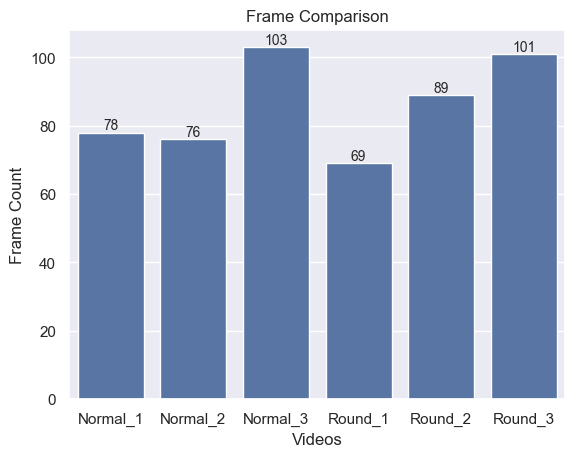

In [8]:
from matplotlib.colors import to_hex
frame_compare_df = pd.DataFrame({
    "Videos" : name_labels,
    "Frame Count": frame_count
})

sns.set_theme()
frame_compare = sns.barplot(frame_compare_df, x="Videos", y="Frame Count", estimator="sum", 
                            errorbar=None)
frame_compare.bar_label(frame_compare.containers[0], fontsize=10)
frame_compare.set_title("Frame Comparison")

### For 3D plot visualization

In [170]:
# connections for the MediaPipe topology
LANDMARK_GROUPS = [
    [8, 6, 5, 4, 0, 1, 2, 3, 7],   # eyes
    [10, 9],                       # mouth
    [11, 13, 15, 17, 19, 15, 21],  # right arm
    [11, 23, 25, 27, 29, 31, 27],  # right body side
    [12, 14, 16, 18, 20, 16, 22],  # left arm
    [12, 24, 26, 28, 30, 32, 28],  # left body side
    [11, 12],                      # shoulder
    [23, 24],                      # waist
]


def plot_world_landmarks(ax, landmarks, landmark_groups=LANDMARK_GROUPS):
    """_summary_
    Args:
        ax: plot axes
        landmarks  mediapipe
    """

    # skip when no landmarks are detected
    if landmarks is None:
        return

    ax.cla()

    # X-axis
    # ax.view_init(azim=0, elev=0) 
    # Y-axis
    # ax.view_init(azim=90, elev=0)
    # Z-axis
    # ax.view_init(azim=0, elev=90) 

    # had to flip the z axis
    ax.set_xlim3d(0, 1)
    ax.set_ylim3d(-0.5, 0.5)
    ax.set_zlim3d(1, 0)

    # get coordinates for each group and plot
    for group in landmark_groups:
        plotX, plotY, plotZ = [], [], []

        plotX = [landmarks[i, 0] for i in group]
        plotY = [landmarks[i, 1] for i in group]
        plotZ = [landmarks[i, 2] for i in group]

        # this can be changed according to your camera
        ax.plot(plotX, plotZ, plotY)

    ax.set_xlabel('X', color="blue", size=10)
    ax.set_ylabel('Y', color="green", size=10)
    ax.set_zlabel('Z', color="purple", size=10)

    ax.set_box_aspect(None, zoom=1.2)
    return

In [171]:
array = []
def save_plot():
    for sequences in range(sample_reshaped.shape[0]):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        plot_world_landmarks(ax=ax, landmarks=sample_reshaped[sequences])
        ax.text2D(0,1, f"Frame no.:{sequences}", transform=ax.transAxes, color="red")
        ax.set_xlim(-0.1, 0.1)  # Set x-axis limits from 0 to 0.2
        ax.set_ylim(0.1, 0.2)  # Set y-axis limits from 0 to 0.2
        ax.set_zlim(-0.1, 0.1)  # Set z-axis limits from 0 to 0.2
        ax.get_xaxis().set_visible(False)
        plt.savefig(f'testAnimation/{sequences}')

In [ ]:
save_plot()

In [173]:
def key_f(x):
    head, tail = x.split('.', 1)
    return(int(head), tail)

In [174]:
image_files = sorted(os.listdir('testAnimation'), key=key_f)

files = []
for i in range(len(image_files)):
    files.append(os.path.join('testAnimation', image_files[i]))

Stored image_arrays shape: (89, 480, 640, 4)


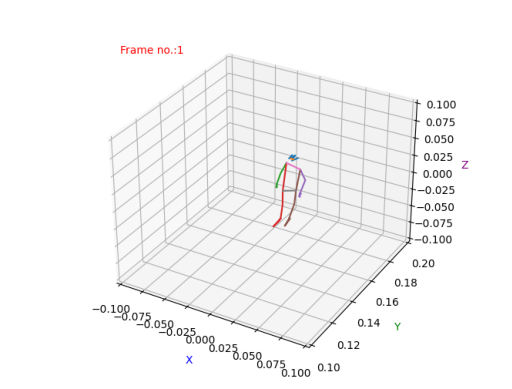

In [175]:
from PIL import Image
def store_image(files):
    image_array = []

    for file in files:

        image = Image.open(file)
        image_array.append(image)

    print(f'Stored image_arrays shape: {np.array(image_array).shape}')
    return image_array

get_image = store_image(files)

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.margins(0. -0.1)  
im = ax.imshow(get_image[1], animated = True)

In [176]:
import matplotlib.animation as animation
def update(i):
    im.set_array(get_image[i])
    return im

animation_fig = animation.FuncAnimation(fig, update, frames = len(get_image), interval=1, repeat_delay=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.margins(0. -0.05)  
plt.show()

animation_fig.save('animated_normal_pos.gif')

### Training Data and Testing Data

In [14]:
def get_min(data_all):
    values = []
    preprocessed_data = []
    for data in data_all:
        values.append(len(data))

    min_value = min(values)
    for data in data_all:
        preprocessed_data.append(data[:min_value,:])
        
    return preprocessed_data

In [15]:
preprocessed_data = get_min(data_all=data_all)

In [16]:
preprocessed_data = np.asarray(preprocessed_data)
labels = np.array(labels)

In [17]:
if(preprocessed_data.shape[0]==labels.shape[0]):
    print('Shape matches, continue for training')
else:
    print('Shape does not match')
print(f'The shape of the Data: {preprocessed_data.shape}')
print(f'The shape of the labels: {labels.shape}')

Shape matches, continue for training
The shape of the Data: (6, 69, 99)
The shape of the labels: (6,)


In [18]:
from keras.utils import to_categorical
reshaped_data = np.reshape(preprocessed_data, (6, 69, 33, 3))
encoded_labels = to_categorical(labels)

In [19]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(reshaped_data,
                                                                            encoded_labels,
                                                                            test_size=0.1,
                                                                            shuffle=True)

### Model implementations -> Incomplete

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, Dropout, MaxPool1D, TimeDistributed, Flatten, Input

def lstm_model():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=2, kernel_size=(3), activation='relu',
                                     padding='same'), input_shape = (69, 33, 3)))
    model.add(TimeDistributed(MaxPool1D(pool_size=(2), padding = 'same')))
    model.add(TimeDistributed(Dropout(0.1)))

    model.add(TimeDistributed(Conv1D(filters=4, kernel_size=(3), activation='relu',
                                     padding='same')))
    model.add(TimeDistributed(MaxPool1D(pool_size=(2), padding = 'same')))
    model.add(TimeDistributed(Dropout(0.1)))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(units=2))
    model.add(Dense(units=2, activation='sigmoid'))

    return model

In [28]:
lstm = lstm_model()
lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_14             │ (None, 69, 33, 8)      │            80 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 69, 17, 8)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 69, 17, 8)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 69, 17, 16)     │           400 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 69, 9, 16)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 69, 9, 16)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 69, 144)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,818 (42.26 KB)

 Trainable params: 10,818 (42.26 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'loss', patience = 5)

In [30]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-4)

In [31]:
lstm.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics=(['accuracy']))

In [32]:
epochs = 50
history = lstm.fit(features_train, labels_train, epochs = epochs, batch_size = 1,
                           shuffle = True, validation_split = 0.1)

lstm.save_weights('model3_saved.weights.h5')

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2667 - loss: 0.7461 - val_accuracy: 1.0000 - val_loss: 0.6380
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4333 - loss: 0.7006 - val_accuracy: 1.0000 - val_loss: 0.6516
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.7287 - val_accuracy: 1.0000 - val_loss: 0.6631
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8333 - loss: 0.6685 - val_accuracy: 1.0000 - val_loss: 0.6764
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1667 - loss: 0.7343 - val_accuracy: 1.0000 - val_loss: 0.6865
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5667 - loss: 0.6502 - val_accuracy: 0.0000e+00 - val_loss: 0.6999
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6333 - loss: 0.6939 - val_accuracy: 0.0000e+00 - val_loss: 0.7142
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5667 - loss: 0.7085 - val_accuracy: 0.0000e+00 - va

In [213]:
lstm.evaluate(features_test, labels_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0000e+00 - loss: 2.8189


[2.818850517272949, 0.0]

In [22]:
lstm.load_weights(f'model2_saved.weights.h5')

In [214]:
conditions = np.unique(conditions)

In [215]:
import cv2
from collections import deque
import mediapipe as mp

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
def predict_action(seq_length):

    cap = cv2.VideoCapture(0)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        frames_queue = deque(maxlen = seq_length)

        predicted_action = ''

        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                break
            
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results_from_video = holistic.process(image)
            image.flags.writeable = True

            mp_drawing.draw_landmarks(image, results_from_video.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(80,110,10), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(80,256,121), thickness=2, circle_radius=4))
            
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            keypoints = []
            if results_from_video.pose_landmarks:
                for res in results_from_video.pose_landmarks.landmark:
                    keypoints.append([res.x, res.y, res.z])
            else:
                    keypoints = np.zeros(33*3)
            keypoints = np.array(keypoints).flatten()
            keypoints = np.reshape(keypoints, (33, 3))
            keypoints = normalize(keypoints)

            print(keypoints)
            frames_queue.append(keypoints)
            print(np.array(frames_queue).shape)
            if len(frames_queue) == seq_length:

                predicted_labels_prob = lstm.predict(np.expand_dims(frames_queue, axis = 0))[0]

                predicted_label = np.argmax(predicted_labels_prob)

                predicted_action = conditions[predicted_label]

            cv2.putText(image, predicted_action, (10,100), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)

            cv2.imshow("Example", image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

In [ ]:
predict_action(69)

In [50]:
cv2.destroyAllWindows()

In [58]:
import numpy as np
test_data = np.expand_dims(np.random.rand(69, 33, 3), axis=0) # Adjust as needed
test_data.shape

(1, 69, 33, 3)